<a href="https://colab.research.google.com/github/jakubdaron/MTR_optymalizacja/blob/main/Problem_RPQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[  8  43 222]
 [ 41   9 147]
 [ 52  15 170]
 [ 65  36 126]
 [ 91   6 298]
 [ 94   6  90]
 [107  39 292]
 [123  11  21]
 [148   3  77]
 [187   5  72]
 [211   2 272]
 [222  35  52]
 [223  34  75]
 [244  49 257]
 [245  17 237]
 [256   4 283]
 [257  22 165]
 [286  33 276]
 [293  37  59]
 [324  35 307]]
time: 0, current_task: 0, bufor_queue: []
time: 1, current_task: -1, bufor_queue: []
time: 2, current_task: -2, bufor_queue: []
time: 3, current_task: -3, bufor_queue: []
time: 4, current_task: -4, bufor_queue: []
time: 5, current_task: -5, bufor_queue: []
time: 6, current_task: -6, bufor_queue: []
time: 7, current_task: -7, bufor_queue: []
time: 8, current_task: 43, bufor_queue: []
time: 9, current_task: 42, bufor_queue: []
time: 10, current_task: 41, bufor_queue: []
time: 11, current_task: 40, bufor_queue: []
time: 12, current_task: 39, bufor_queue: []
time: 13, current_task: 38, bufor_queue: []
time: 14, current_task: 37, bufor_queue: []
time: 15, current_task: 36, bufor_queue: []
time: 

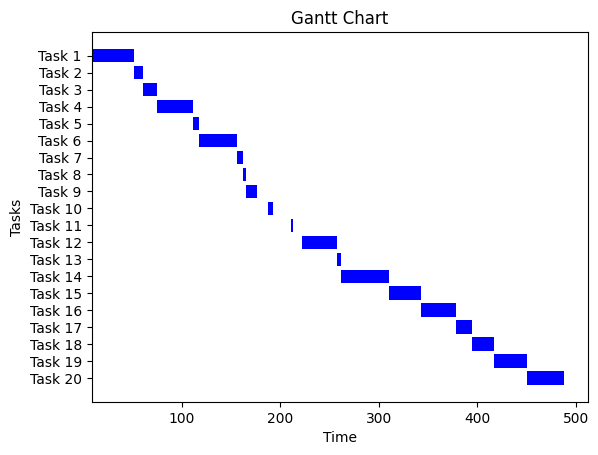

In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_sorted_rpq_table(n, F):
    rpq = []
    # generate random r, p, q values
    for i in range(n):
        r = random.randint(0, n*F)
        p = random.randint(1, 50)
        q = random.randint(0, n*F)
        rpq.append([r, p, q])

    # sort rpq table in increasing order of r values
    rpq = np.array(rpq)
    sorted_rpq = rpq[rpq[:, 0].argsort()]
    #sorted_rpq = np.array([[6, 4, 2], [6, 8, 3], [10, 2, 3], [12, 3, 0]])
    return sorted_rpq

def add_and_sort_bufor(sorted_rpq, iteration, bufor_queue):
    bufor = sorted_rpq[iteration].tolist()
    bufor_queue.append(bufor)
    bufor_queue = np.array(bufor_queue)

    # sort bufor_queue in decreasing order of q values
    sorted_bufor = bufor_queue[bufor_queue[:, 2].argsort()[::-1]]
    bufor_queue = sorted_bufor.tolist()
    return bufor_queue

def plot_gantt_chart(schedule):
    fig, ax = plt.subplots()
    tasks = [f'Task {i+1}' for i in range(len(schedule))]

    for i, task in enumerate(schedule):
        start_time, end_time = task
        ax.barh(tasks[i], end_time - start_time, left=start_time, color='blue')

    ax.set_xlabel('Time')
    ax.set_ylabel('Tasks')
    ax.set_title('Gantt Chart')
    ax.invert_yaxis()  # Invert the y-axis to have Task 1 at the top

    plt.show()

def optimise_function(sorted_rpq, n):

    schedule = []

    iteration = 0
    bufor_queue = []
    current_task = 0
    time = 0
    end_iteration = 0
    end_def = 0

    while end_def == 0:
        #print(current_task)
        if time == sorted_rpq[iteration, 0]:
            while True:
                bufor_queue = add_and_sort_bufor(sorted_rpq, iteration, bufor_queue)
                if iteration < n-1:
                    iteration += 1
                else:
                    end_iteration = 1

                if sorted_rpq[iteration, 0] != sorted_rpq[iteration-1, 0]:
                    break

        if current_task <= 0 and bufor_queue:
            current_task = bufor_queue[0][1]
            schedule.append([time, time+bufor_queue[0][1]])
            bufor_queue.pop(0)

        print(f"time: {time}, current_task: {current_task}, bufor_queue: {bufor_queue}")
        #print(f"time: {time}, current_task: {current_task}")
        time += 1
        current_task -= 1

        if end_iteration == 1:
            if current_task == 0 and len(bufor_queue) == 0:
                end_def = 1

    plot_gantt_chart(schedule)


if __name__ == "__main__":
    F = 17
    n = 20
    sorted_rpq = generate_sorted_rpq_table(n, F)
    print(sorted_rpq)
    optimise_function(sorted_rpq, n)
